# CNN - Convolutional Neural Network

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN,LSTM,Activation, Dropout, Conv1D, Flatten,MaxPooling1D, Conv2D, MaxPooling2D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization


In [80]:
## MFCC Feature

In [81]:
mfcc_df = pd.read_csv('../../../Data/Features/MFCC_Data.csv',index_col=0)

In [82]:
mfcc_df.head()

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,...,MFCC_42,MFCC_43,MFCC_44,MFCC_45,MFCC_46,MFCC_47,MFCC_48,MFCC_49,MFCC_50,Label
12,-289.21213,110.805435,-21.313496,15.978510,-22.054483,3.363043,-11.504783,4.508069,-4.662264,4.716395,...,0.059355,2.855525,1.902572,-0.555519,1.149774,2.588985,1.999745,-1.386203,-1.444516,ang
27,-257.24110,99.345795,-10.082610,29.844202,-9.154385,3.967014,-12.355303,-1.142314,-10.105771,-5.000117,...,0.989184,0.651739,0.792287,1.076015,-0.238661,1.113345,1.410870,0.780703,1.017746,ang
29,-162.67676,97.780200,-46.044758,14.602550,-16.414543,1.585601,-16.828533,-6.045789,-7.403815,2.705874,...,0.827159,-0.507063,0.961427,0.716429,-0.255313,0.953160,0.523185,-0.263831,0.031629,ang
30,-440.63580,130.743640,0.374263,29.192797,-6.186107,13.845780,-11.397534,9.895559,-3.589840,6.202628,...,-0.201709,2.073562,0.830128,-0.185219,-0.298924,1.384827,-0.419494,0.965666,-0.594039,sad
31,-454.82550,133.810840,-1.461820,33.532536,-11.242642,18.659878,-11.550693,15.192266,-6.038576,10.610360,...,-0.389133,1.939244,0.504643,0.578664,-0.076486,1.395140,-0.559993,-0.541744,-1.073842,sad


In [83]:
new_lab = mfcc_df['Label']
count_lab= len(mfcc_df['Label'].value_counts())
count_lab

3

In [84]:
features = mfcc_df.drop(['Label'], axis=1).values
lab = mfcc_df['Label'].values

# Convert features and corresponding classification labels into numpy arrays
X = np.array(features.tolist())
y = np.array(lab.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

### Split the dataset inot train and test set


In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.25, random_state = 4)

In [86]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2421, 50)
(2421, 3)
(807, 50)
(807, 3)


In [87]:
cnn_mfcc_model = Sequential()
cnn_mfcc_model.add(Conv1D(256, 4, padding='same',input_shape=(x_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
cnn_mfcc_model.add(Activation('relu'))
cnn_mfcc_model.add(Conv1D(256, 4, padding='same'))
cnn_mfcc_model.add(BatchNormalization())
cnn_mfcc_model.add(Activation('relu'))
cnn_mfcc_model.add(Conv1D(64, 4, padding='same'))
cnn_mfcc_model.add(Activation('relu'))
cnn_mfcc_model.add(Flatten())
cnn_mfcc_model.add(Dense(count_lab)) # Target class number
cnn_mfcc_model.add(Activation('softmax'))

In [88]:
cnn_mfcc_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 50, 256)           1280      
                                                                 
 activation_40 (Activation)  (None, 50, 256)           0         
                                                                 
 conv1d_14 (Conv1D)          (None, 50, 256)           262400    
                                                                 
 batch_normalization_5 (Batc  (None, 50, 256)          1024      
 hNormalization)                                                 
                                                                 
 activation_41 (Activation)  (None, 50, 256)           0         
                                                                 
 conv1d_15 (Conv1D)          (None, 50, 64)            65600     
                                                      

In [89]:
cnn_mfcc_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
              metrics=['accuracy'])

In [90]:
num_epochs = 50
num_batch_size = 128

mfcc_his=cnn_mfcc_model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
19/19 [==============================] - 12s 582ms/step - loss: 1.2589 - accuracy: 0.4684 - val_loss: 0.9650 - val_accuracy: 0.5886
Epoch 2/50
19/19 [==============================] - 11s 593ms/step - loss: 0.7298 - accuracy: 0.6559 - val_loss: 1.0895 - val_accuracy: 0.5936
Epoch 3/50
19/19 [==============================] - 4s 179ms/step - loss: 0.6910 - accuracy: 0.6881 - val_loss: 0.9173 - val_accuracy: 0.6530
Epoch 4/50
19/19 [==============================] - 6s 310ms/step - loss: 0.6526 - accuracy: 0.7022 - val_loss: 0.8928 - val_accuracy: 0.6580
Epoch 5/50
19/19 [==============================] - 5s 253ms/step - loss: 0.6468 - accuracy: 0.6935 - val_loss: 0.8321 - val_accuracy: 0.6691
Epoch 6/50
19/19 [==============================] - 11s 578ms/step - loss: 0.6187 - accuracy: 0.7270 - val_loss: 0.8115 - val_accuracy: 0.6667
Epoch 7/50
19/19 [==============================] - 4s 187ms/step - loss: 0.5941 - accuracy: 0.7410 - val_loss: 0.7892 - val_accuracy: 0.6865
Epo

KeyboardInterrupt: 

### Evaluating the model on the training and testing set


In [ ]:
# Evaluating the model on the training and testing set
mfccscore = cnn_mfcc_model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(mfccscore[1]))

mfccscore = cnn_mfcc_model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(mfccscore[1]))

### Accuracy & Loss Curve

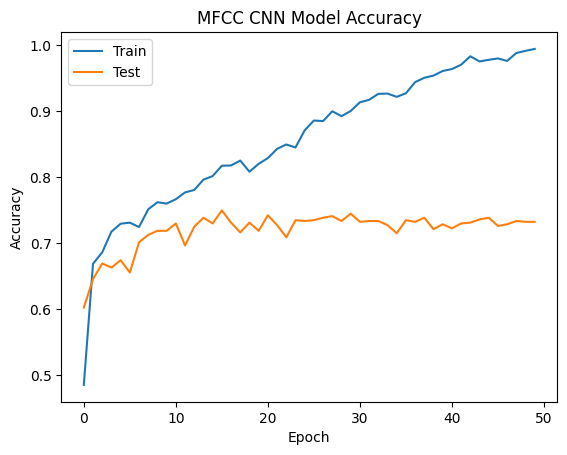

In [23]:
plt.plot(mfcc_his.history['accuracy'])
plt.plot(mfcc_his.history['val_accuracy'])
plt.title('MFCC CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

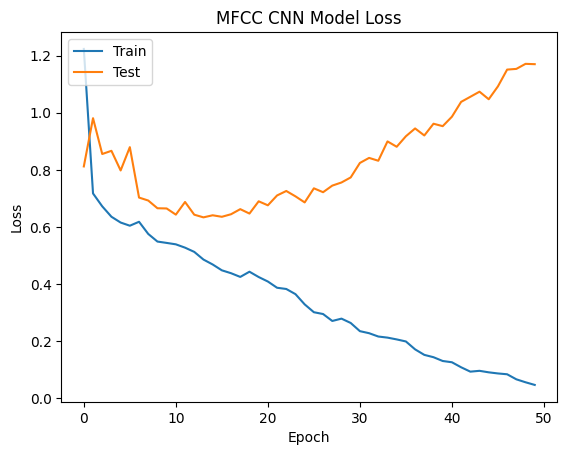

In [24]:
plt.plot(mfcc_his.history['loss'])
plt.plot(mfcc_his.history['val_loss'])
plt.title('MFCC CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Confusion Matrix

In [91]:
mfcc_predictions = cnn_mfcc_model.predict(x_test)
y_pred_mfcc= np.array(mfcc_predictions)
y_true_mfcc = np.array(y_test)
# Convert predicted probabilities to binary predictions
y_pred_binary_mfcc = np.argmax(y_pred_mfcc, axis=1)
y_true_binary_mfcc = np.argmax(y_true_mfcc, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true_binary_mfcc, y_pred_binary_mfcc)

26/26 [==============================] - 1s 44ms/step


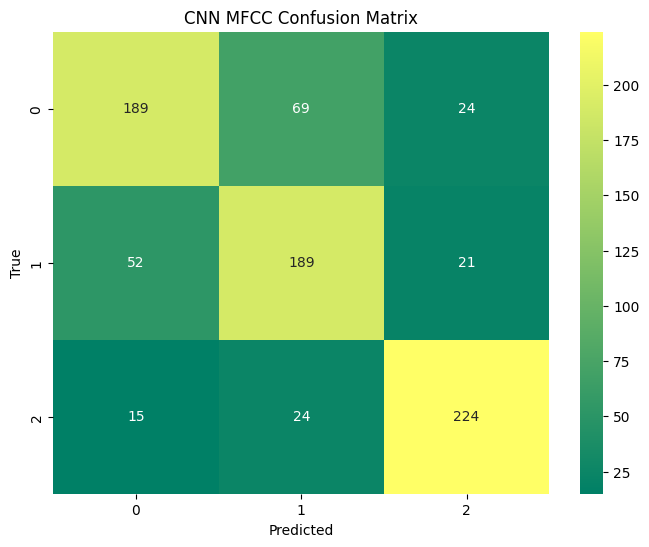

In [92]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="summer")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN MFCC Confusion Matrix')
plt.show()

## PCP Feature

In [93]:
pcp_df = pd.read_csv('../../../Data/Features/PCP_Data.csv',index_col=0)

In [94]:
pcp_df.head()

,PCP1,PCP2,PCP3,PCP4,PCP5,PCP6,PCP7,PCP8,PCP9,PCP10,PCP11,PCP12,Label
12,0.468665,0.418584,0.470229,0.402123,0.438475,0.465702,0.430603,0.472777,0.384107,0.399642,0.339348,0.520844,ang
27,0.463213,0.431536,0.431190,0.410230,0.384602,0.391240,0.444501,0.380445,0.379131,0.423372,0.379215,0.408315,ang
29,0.393176,0.394829,0.384227,0.407025,0.433312,0.394724,0.341926,0.305187,0.309041,0.324220,0.306156,0.315559,ang
30,0.546842,0.518859,0.569832,0.522063,0.484166,0.571499,0.470337,0.477768,0.473719,0.458764,0.482684,0.630568,sad
31,0.690118,0.551490,0.515464,0.597981,0.554355,0.688720,0.588746,0.407920,0.408882,0.432478,0.442955,0.572069,sad


### Extract features and Labels

In [95]:
pcpf = pcp_df.drop(['Label'], axis=1).values
pcp_lab = pcp_df['Label'].values
count= len(pcp_lab)

### Convert features and corresponding classification labels into numpy arrays

In [96]:
X_pcp = np.array(pcpf.tolist())
y_pcp = np.array(pcp_lab.tolist())

### Encode the classification labels

In [97]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y_pcp)
encoded_labels = to_categorical(encoded_labels)

### Split dataset into training and testing

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_pcp, encoded_labels, test_size=0.2, random_state=21)

In [99]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2421, 50)
(2582, 3)
(807, 50)
(646, 3)


In [100]:
pcp_cnn_model=Sequential()
###first layer
pcp_cnn_model.add(Dense(100,input_shape=(12,)))
pcp_cnn_model.add(Activation('relu'))
pcp_cnn_model.add(Dropout(0.5))
###second layer
pcp_cnn_model.add(Dense(200))
pcp_cnn_model.add(Activation('relu'))
pcp_cnn_model.add(Dropout(0.5))
###third layer
pcp_cnn_model.add(Dense(100))
pcp_cnn_model.add(Activation('relu'))
pcp_cnn_model.add(Dropout(0.5))

###final layer
pcp_cnn_model.add(Dense(len(label_encoder.classes_)))
pcp_cnn_model.add(Activation('softmax'))

In [101]:
pcp_cnn_model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [102]:
pcp_his = pcp_cnn_model.fit(X_train, y_train,epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
81/81 [==============================] - 2s 9ms/step - loss: 1.1025 - accuracy: 0.3424 - val_loss: 1.0778 - val_accuracy: 0.4102
Epoch 2/30
81/81 [==============================] - 0s 6ms/step - loss: 1.0827 - accuracy: 0.3749 - val_loss: 1.0407 - val_accuracy: 0.4876
Epoch 3/30
81/81 [==============================] - 1s 7ms/step - loss: 1.0391 - accuracy: 0.4419 - val_loss: 0.9683 - val_accuracy: 0.4985
Epoch 4/30
81/81 [==============================] - 0s 5ms/step - loss: 1.0043 - accuracy: 0.4706 - val_loss: 0.9283 - val_accuracy: 0.5310
Epoch 5/30
81/81 [==============================] - 0s 6ms/step - loss: 0.9582 - accuracy: 0.4973 - val_loss: 0.8848 - val_accuracy: 0.5712
Epoch 6/30
81/81 [==============================] - 0s 5ms/step - loss: 0.9568 - accuracy: 0.5074 - val_loss: 0.8902 - val_accuracy: 0.5635
Epoch 7/30
81/81 [==============================] - 1s 7ms/step - loss: 0.9368 - accuracy: 0.5283 - val_loss: 0.8837 - val_accuracy: 0.5557
Epoch 8/30
81/81 [==

### Evaluating the model on the training and testing set


In [103]:
pcpscore = pcp_cnn_model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(pcpscore[1]))

pcpscore = pcp_cnn_model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(pcpscore[1]))

Training Accuracy: 57.01%
Testing Accuracy: 57.28%


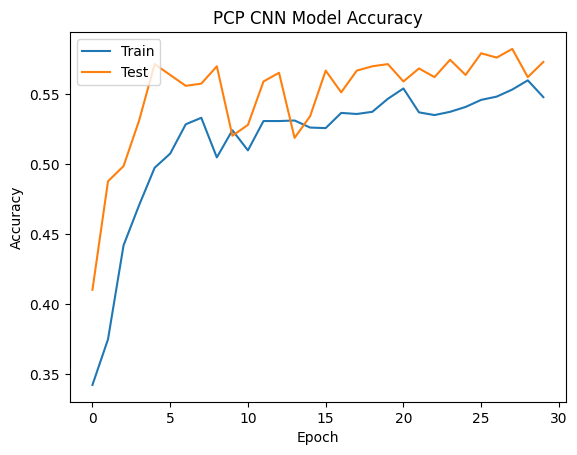

In [104]:
plt.plot(pcp_his.history['accuracy'])
plt.plot(pcp_his.history['val_accuracy'])
plt.title('PCP CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

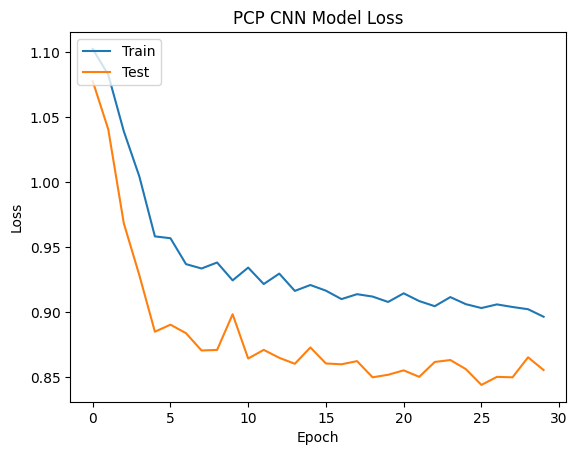

In [105]:
plt.plot(pcp_his.history['loss'])
plt.plot(pcp_his.history['val_loss'])
plt.title('PCP CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Confusion Matrix 

In [106]:
pcp_predictions = pcp_cnn_model.predict(X_test)
y_pred_pcp= np.array(pcp_predictions)
y_true_pcp = np.array(y_test)
# Convert predicted probabilities to binary predictions
y_pred_binary_pcp = np.argmax(y_pred_pcp, axis=1)
y_true_binary_pcp = np.argmax(y_true_pcp, axis=1)


21/21 [==============================] - 0s 2ms/step


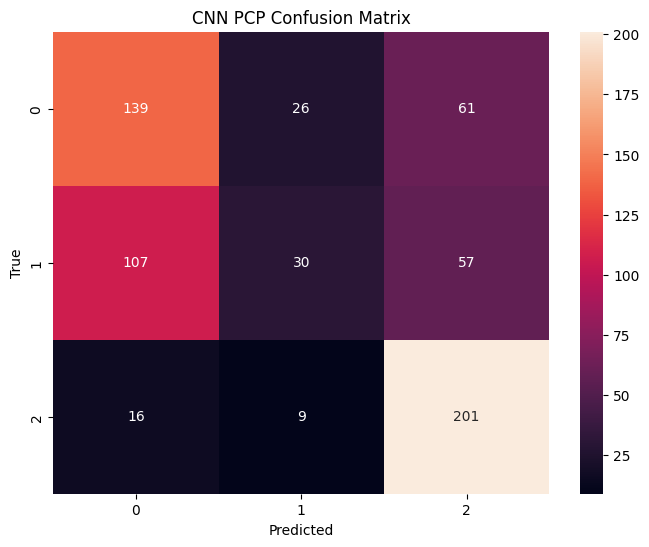

In [127]:
# Create confusion matrix
cmpcp = confusion_matrix(y_true_binary_pcp, y_pred_binary_pcp)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmpcp, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN PCP Confusion Matrix')
plt.show()

## LCP Feature

In [108]:
df_lcpp = pd.read_csv('../../../Data/Features/LCP_data.csv',index_col=0)

In [109]:
df_lcpp.head()

,LCP1,LCP2,LCP3,LCP4,LCP5,LCP6,LCP7,LCP8,LCP9,LCP10,LCP11,Label
12,1.0,-4.620619,11.216498,-18.965210,24.804852,-26.135841,22.393353,-15.348988,8.033380,-2.891480,0.543560,ang
27,1.0,-4.243772,9.878223,-16.549742,21.832207,-23.426395,20.516266,-14.562426,8.120422,-3.267545,0.721418,ang
29,1.0,-4.550903,10.997309,-18.775156,24.923088,-26.633648,23.093740,-16.064710,8.651243,-3.271798,0.654612,ang
30,1.0,50.537933,-286.185970,745.173340,-1258.394200,1555.833300,-1455.320100,1020.872900,-502.843230,140.464550,-10.920460,sad
31,1.0,125.109380,-540.967000,1161.417100,-1682.114900,1787.451500,-1398.142600,757.090600,-213.570710,-31.442951,34.692960,sad


In [110]:
df_lcpp.shape

(3228, 12)

### Extract features and Labels

In [111]:
lcpf = df_lcpp.drop(['Label'], axis=1).values
lcp_lab = df_lcpp['Label'].values
lcpcount= len(lcp_lab)

### Convert features and corresponding classification labels into numpy arrays

In [112]:
X_lcp = np.array(lcpf.tolist())
y_lcp = np.array(lcp_lab.tolist())

### Encode the classification labels

In [113]:
label_encoder = LabelEncoder()
encoded_labels_lcp = label_encoder.fit_transform(y_lcp)
encoded_labels_lcp = to_categorical(encoded_labels_lcp)

### Split data inot training and testing set

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_lcp, encoded_labels_lcp, test_size=0.2, random_state=21)

In [115]:
lcp_model=Sequential()
###first layer
lcp_model.add(Dense(100,input_shape=(11,)))
lcp_model.add(Activation('relu'))
lcp_model.add(Dropout(0.5))
###second layer
lcp_model.add(Dense(200))
lcp_model.add(Activation('relu'))
lcp_model.add(Dropout(0.5))
###third layer
lcp_model.add(Dense(100))
lcp_model.add(Activation('relu'))
lcp_model.add(Dropout(0.5))

###final layer
lcp_model.add(Dense(len(label_encoder.classes_)))
lcp_model.add(Activation('softmax'))

In [116]:
lcp_model.summary()
X_train[0].shape

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 100)               1200      
                                                                 
 activation_48 (Activation)  (None, 100)               0         
                                                                 
 dropout_25 (Dropout)        (None, 100)               0         
                                                                 
 dense_33 (Dense)            (None, 200)               20200     
                                                                 
 activation_49 (Activation)  (None, 200)               0         
                                                                 
 dropout_26 (Dropout)        (None, 200)               0         
                                                                 
 dense_34 (Dense)            (None, 100)             

(11,)

In [117]:
# Compile the model
lcp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [118]:
# Train the model
lcp_his = lcp_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
81/81 [==============================] - 2s 11ms/step - loss: 1015.1169 - accuracy: 0.3470 - val_loss: 53.9324 - val_accuracy: 0.3189
Epoch 2/30
81/81 [==============================] - 1s 7ms/step - loss: 5058.4854 - accuracy: 0.3400 - val_loss: 82.9600 - val_accuracy: 0.3173
Epoch 3/30
81/81 [==============================] - 1s 7ms/step - loss: 16026.4883 - accuracy: 0.3408 - val_loss: 43.2947 - val_accuracy: 0.3142
Epoch 4/30
81/81 [==============================] - 1s 7ms/step - loss: 1175.4895 - accuracy: 0.3451 - val_loss: 77.7459 - val_accuracy: 0.2988
Epoch 5/30
81/81 [==============================] - 1s 7ms/step - loss: 5821.8735 - accuracy: 0.3424 - val_loss: 54.1656 - val_accuracy: 0.3870
Epoch 6/30
81/81 [==============================] - 1s 6ms/step - loss: 13959.3311 - accuracy: 0.3400 - val_loss: 57.2766 - val_accuracy: 0.2926
Epoch 7/30
81/81 [==============================] - 1s 7ms/step - loss: 2478.0159 - accuracy: 0.3397 - val_loss: 38.3250 - val_accura

### Evaluating the model on the training and testing set

In [120]:
lcpscore = lcp_model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(lcpscore[1]))

lcpscore = lcp_model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(lcpscore[1]))

Training Accuracy: 33.11%
Testing Accuracy: 29.72%


### Accuracy and Loss curves

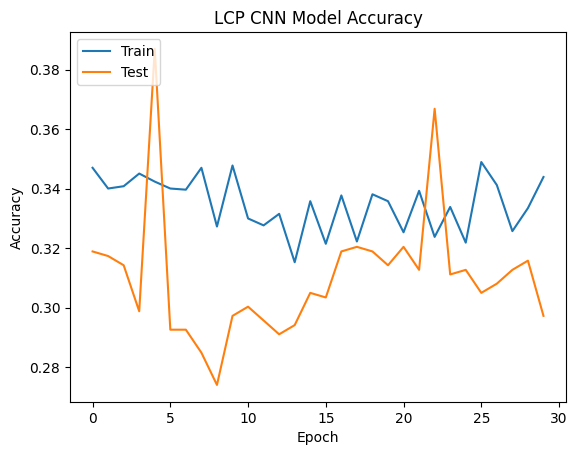

In [121]:
plt.plot(lcp_his.history['accuracy'])
plt.plot(lcp_his.history['val_accuracy'])
plt.title('LCP CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

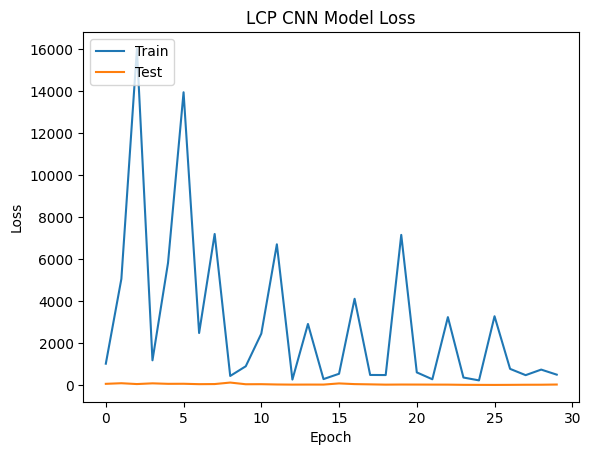

In [126]:
plt.plot(lcp_his.history['loss'])
plt.plot(lcp_his.history['val_loss'])
plt.title('LCP CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Confusion Matrix

In [124]:
lcp_predictions = lcp_model.predict(X_test)
y_pred_lcp= np.array(lcp_predictions)
y_true_lcp = np.array(y_test)
# Convert predicted probabilities to binary predictions
y_pred_binary_lcp = np.argmax(y_pred_lcp, axis=1)
y_true_binary_lcp = np.argmax(y_true_lcp, axis=1)

21/21 [==============================] - 0s 2ms/step


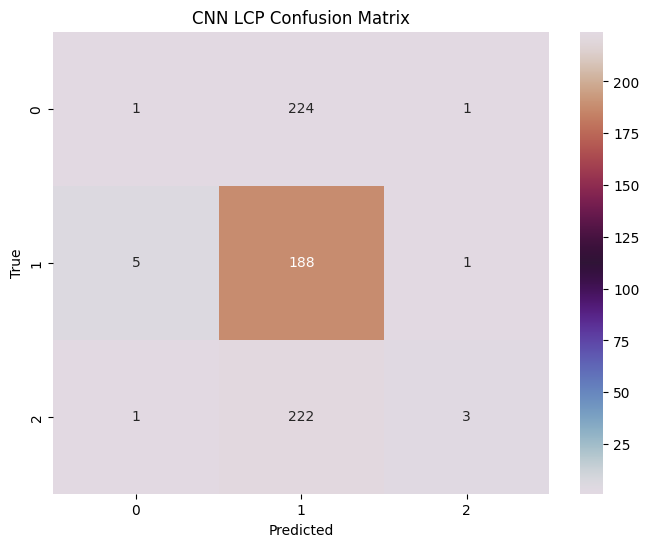

In [128]:
# Create confusion matrix
cmlcp = confusion_matrix(y_true_binary_lcp, y_pred_binary_lcp)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmlcp, annot=True, fmt="d", cmap="twilight")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN LCP Confusion Matrix')
plt.show()

## Conclusion

The reported accuracies for your Convolutional Neural Network (CNN) model using different features indicate variations in performance based on the type of feature employed. Let's analyze the results for each feature:

1. **MFCC Feature:**
   - **Training Accuracy:** 99.83%
   - **Testing Accuracy:** 73.23%
   
   The extremely high training accuracy suggests that the model has almost memorized the training data. However, the testing accuracy is considerably lower, indicating that there may be overfitting to the training set. Despite this, the testing accuracy is relatively high, suggesting that the MFCC features capture important patterns in the data.

2. **PCP Feature:**
   - **Training Accuracy:** 56.35%
   - **Testing Accuracy:** 57.12%
   
   Both training and testing accuracies for PCP features are moderate and relatively close. While the model generalizes better than LCP (Linear Predictive Coding) in this case, the overall performance is not as high as with MFCC features. The accuracy suggests that PCP features are somewhat effective but may not capture all the relevant information.

3. **LCP Feature:**
   - **Training Accuracy:** 33.54%
   - **Testing Accuracy:** 32.20%
   
   Both training and testing accuracies for LCP features are low. The model's inability to perform well on both training and testing sets indicates that LCP features might not effectively represent the critical information in the data for the task at hand.

**Conclusion:**
- The CNN model performs exceptionally well on the training set with MFCC features, indicating a strong ability to learn intricate patterns from the data. However, the drop in testing accuracy suggests a potential overfitting issue.
- PCP features exhibit moderate accuracy, suggesting that they capture some relevant information but are not as effective as MFCC features.
- LCP features result in the lowest accuracy, indicating that they might not be suitable for representing the important characteristics of the data in this context.

**Possible Reasons for Lower Accuracy with Other Features:**
1. **Overfitting:** The extremely high training accuracy for MFCC features suggests overfitting, where the model memorizes the training set and struggles to generalize to new, unseen data. Regularization techniques or reducing model complexity could be explored to mitigate overfitting.
2. **Feature Relevance:** Similar to the ANN case, the choice of features is crucial. MFCC features may be more informative for this specific task than PCP or LCP features.
3. **Model Architecture:** The CNN architecture may not be well-suited to extracting features from PCP and LCP representations, which could impact the overall performance.
4. **Data Characteristics:** The distribution and nature of the data may favor certain types of features, and the less accurate features may not align well with the underlying patterns in the dataset.

To improve the model's performance with PCP and LCP features, you might consider experimenting with different CNN architectures, regularization techniques, or alternative feature representations. Additionally, adjusting hyperparameters and conducting more extensive hyperparameter tuning may help improve the generalization performance of the model.